In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

df=pd.read_csv("C:\\Users\\pratik\\Downloads\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#Basic Cleaning
# Drop customerID (not useful)
df=df.drop(columns=['customerID'])

# Convert TotalCharges to numeric
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
# Handle missing values
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\pratik\AppData\Local\Temp\ipykernel_3908\4084172122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [6]:
#Split X and Y
y=df["Churn"]   #Target
X=df.drop(columns=["Churn"])

In [7]:
#Identify feature types

categorical_cols=X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols=X.select_dtypes(include=["int64","float64"]).columns.tolist()

categorical_cols,numeric_cols

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

In [8]:
#Preprocessing
#Categorical → OneHotEncoder
#Numeric → StandardScaler

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])


In [9]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
#Train Logistic Regression
# Pipeline: preprocessing + model
from sklearn.pipeline import Pipeline

lr_model = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=500))
])

lr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(max_iter=500))])

In [11]:
#Train Random Forest

rf_model = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [12]:
#Evaluate Models

#Logistic Regression
print("------ Logistic Regression ------")
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


------ Logistic Regression ------
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[926 109]
 [165 209]]


In [13]:
#Random Forest
print("------ Random Forest ------")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


------ Random Forest ------
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

[[920 115]
 [195 179]]


In [14]:
#Feature Importance (RandomForest Only)

# Extract trained RF
rf = rf_model.named_steps["model"]

# Extract one-hot category names
ohe = rf_model.named_steps["preprocess"].named_transformers_["cat"]
onehot_names = ohe.get_feature_names_out(categorical_cols)

# Combine numeric & categorical feature names
feature_names = list(onehot_names) + numeric_cols

# Match importances
importances = pd.Series(rf.feature_importances_, index=feature_names)

# Show top 15 important features
importances.sort_values(ascending=False).head(15)


TotalCharges                      0.161289
MonthlyCharges                    0.137810
tenure                            0.136983
Contract_Month-to-month           0.049813
OnlineSecurity_No                 0.032583
PaymentMethod_Electronic check    0.030751
TechSupport_No                    0.026023
InternetService_Fiber optic       0.023271
Contract_Two year                 0.019468
SeniorCitizen                     0.019454
gender_Female                     0.018056
gender_Male                       0.017933
OnlineBackup_No                   0.017374
PaperlessBilling_Yes              0.015240
PaperlessBilling_No               0.015237
dtype: float64

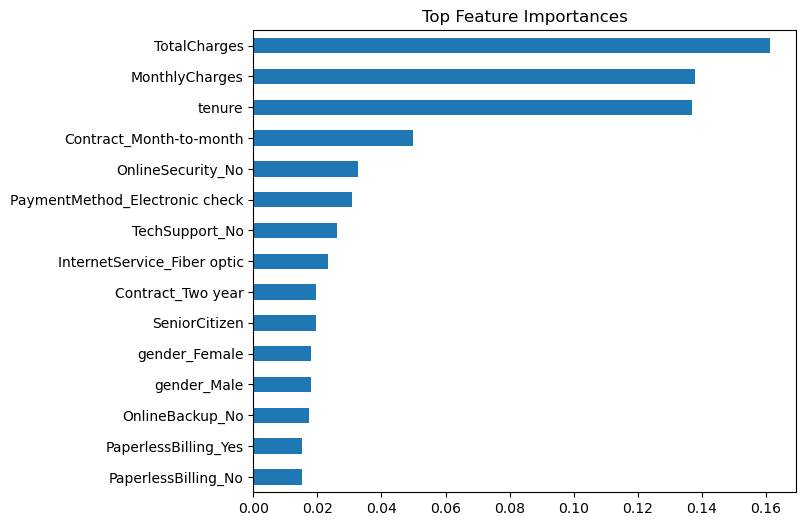

In [15]:
#Original plot
importances.sort_values().tail(15).plot(kind="barh", figsize=(7,6))
plt.title("Top Feature Importances")
plt.show()


In [16]:
#Save Model
joblib.dump(rf_model, "churn_random_forest_model.joblib")
joblib.dump(lr_model, "churn_logistic_model.joblib")

print("Models saved!")

Models saved!
